In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.__version__

'1.2.2'

Read the csv data


In [2]:
df=pd.read_csv('/content/dataset.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
#here the last column isFlaggedFraud is not needed so we drop it
df=df.drop(columns=['isFlaggedFraud'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [6]:
#now let's check the features we have
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

Now we will check the dataset through various type of analysis(uni/multi/bivariate)

In [7]:
#first check the relativity of features
df.corr()

<ipython-input-7-5873ad39b12e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.069450,0.003578,0.003460,0.015715,0.009159,-0.050677
amount,0.069450,1.000000,-0.015391,-0.020991,0.236828,0.364296,0.035281
oldbalanceOrg,0.003578,-0.015391,1.000000,0.998985,0.099253,0.068603,-0.003552
newbalanceOrig,0.003460,-0.020991,0.998985,1.000000,0.100765,0.067591,-0.009606
oldbalanceDest,0.015715,0.236828,0.099253,0.100765,1.000000,0.943255,-0.008841
newbalanceDest,0.009159,0.364296,0.068603,0.067591,0.943255,1.000000,-0.005916
isFraud,-0.050677,0.035281,-0.003552,-0.009606,-0.008841,-0.005916,1.000000


In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,124457.000000,1.244570e+05,1.244560e+05,1.244560e+05,1.244560e+05,1.244560e+05,124456.000000
mean,8.920945,1.773613e+05,9.047501e+05,9.209941e+05,9.004621e+05,1.185246e+06,0.000964
std,1.857028,3.440304e+05,2.850751e+06,2.887776e+06,2.391423e+06,2.749984e+06,0.031037
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,1.059726e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,5.785259e+04,2.009300e+04,0.000000e+00,2.830632e+04,7.527365e+04,0.000000
75%,10.000000,2.180569e+05,1.952794e+05,2.222311e+05,6.424462e+05,1.097218e+06,0.000000
max,11.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000


<ipython-input-8-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

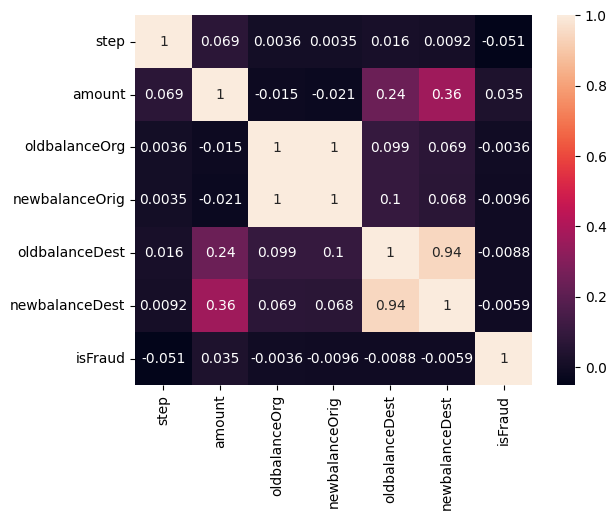

In [8]:
sns.heatmap(df.corr(),annot=True)

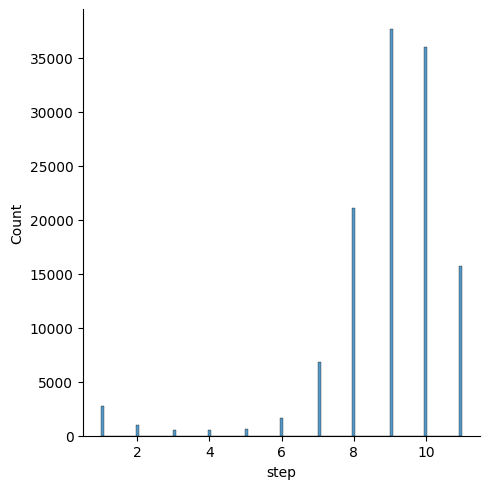

In [9]:
sns.displot(df.step)

<Axes: >

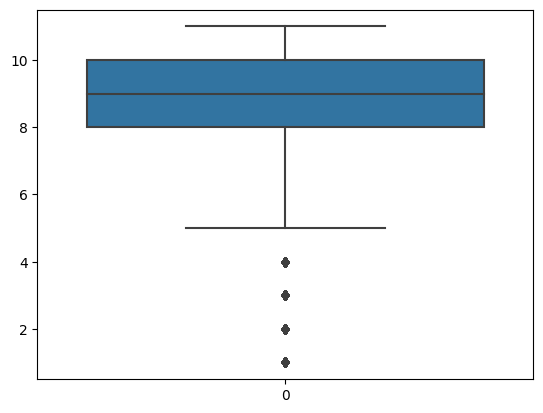

In [10]:
sns.boxplot(df.step)

<Axes: >

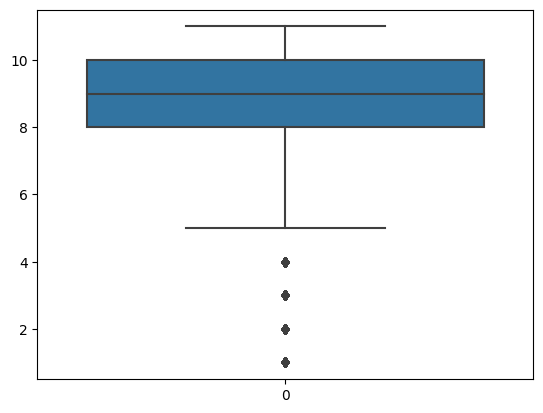

In [12]:
#we will remove the outliers here as well
upper_limit1= 1.5*(df['step'].quantile(0.75)-df['step'].quantile(0.25))+df['step'].quantile(0.75)
df['step']=np.where(df['step']>upper_limit1, df['step'].median(), df['step'])
sns.boxplot(df['step'])


<Axes: xlabel='type', ylabel='count'>

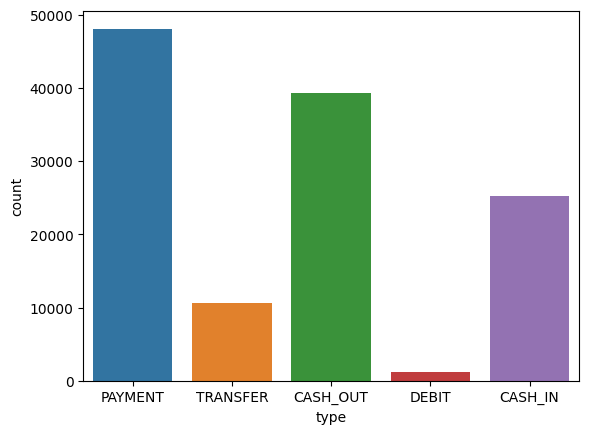

In [13]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

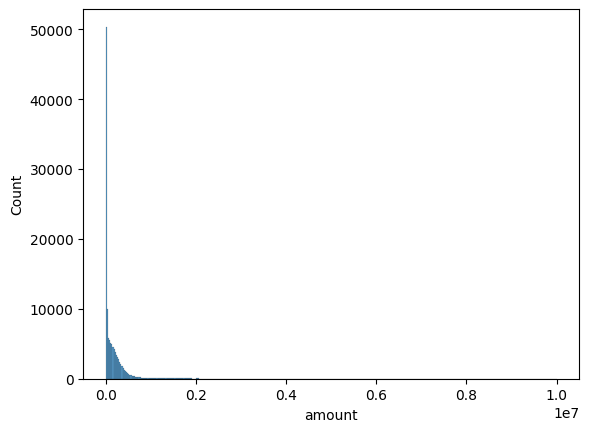

In [14]:
sns.histplot(data=df, x='amount', bins=400)

<Axes: >

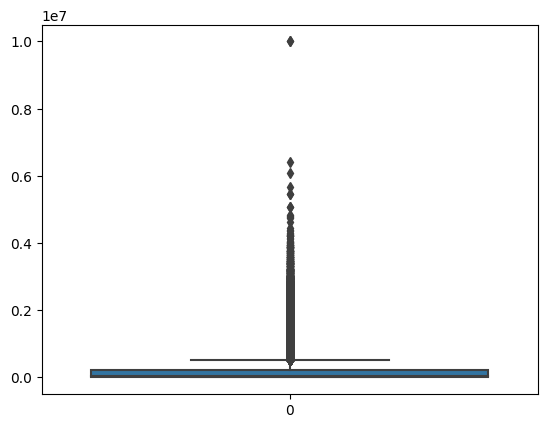

In [15]:
sns.boxplot(df.amount)

<Axes: >

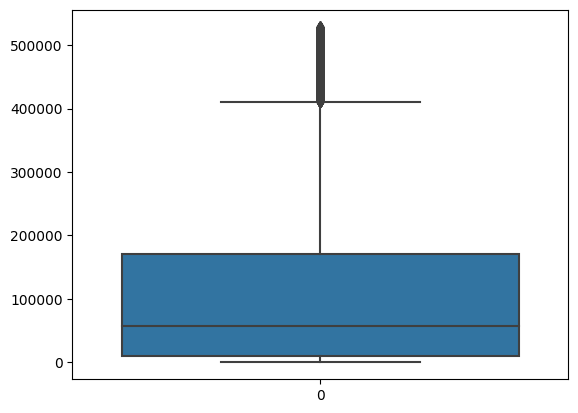

In [16]:
#removing outliers
upper_limit1= 1.5*(df['amount'].quantile(0.75)-df['amount'].quantile(0.25))+df['amount'].quantile(0.75)
df['amount']=np.where(df['amount']>upper_limit1, df['amount'].median(), df['amount'])
sns.boxplot(df['amount'])

In [17]:
df['nameDest'].value_counts()

C985934102     79
C1286084959    77
C248609774     72
C1590550415    72
C2083562754    69
               ..
M1530893262     1
M856951629      1
M383022392      1
M484526894      1
M600628263      1
Name: nameDest, Length: 62212, dtype: int64

<Axes: >

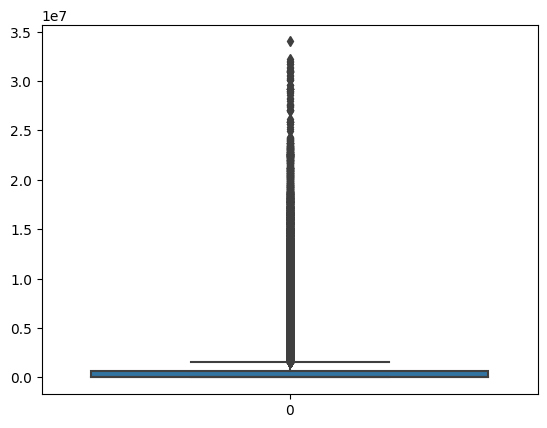

In [18]:
sns.boxplot(df.oldbalanceDest)

In [19]:
#removing outliers
#upper_limit1= 1.5*(df['oldbalanceDest'].quantile(0.75)-df['oldbalanceDest'].quantile(0.25))+df['oldbalanceDest'].quantile(0.75)
#df['oldbalanceDest']=np.where(df['oldbalanceDest']>upper_limit1, df['oldbalanceDest'].median(), df['oldbalanceDest'])
#sns.boxplot(df['oldbalanceDest'])

<Axes: >

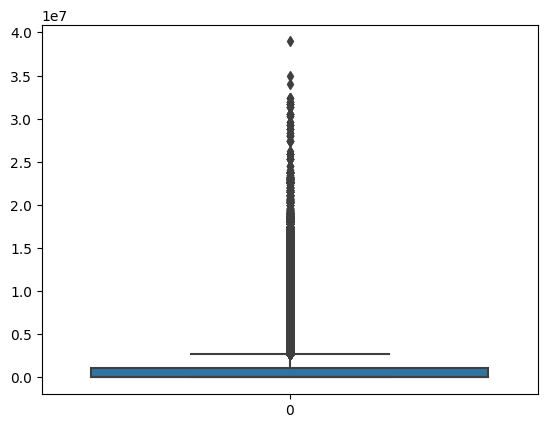

In [20]:
sns.boxplot(df.newbalanceDest)

In [21]:
#removing outliers
#upper_limit1= 1.5*(df['newbalanceDest'].quantile(0.75)-df['newbalanceDest'].quantile(0.25))+df['newbalanceDest'].quantile(0.75)
#df['newbalanceDest']=np.where(df['newbalanceDest']>upper_limit1, df['newbalanceDest'].median(), df['newbalanceDest'])
#sns.boxplot(df['newbalanceDest'])

<Axes: xlabel='isFraud', ylabel='count'>

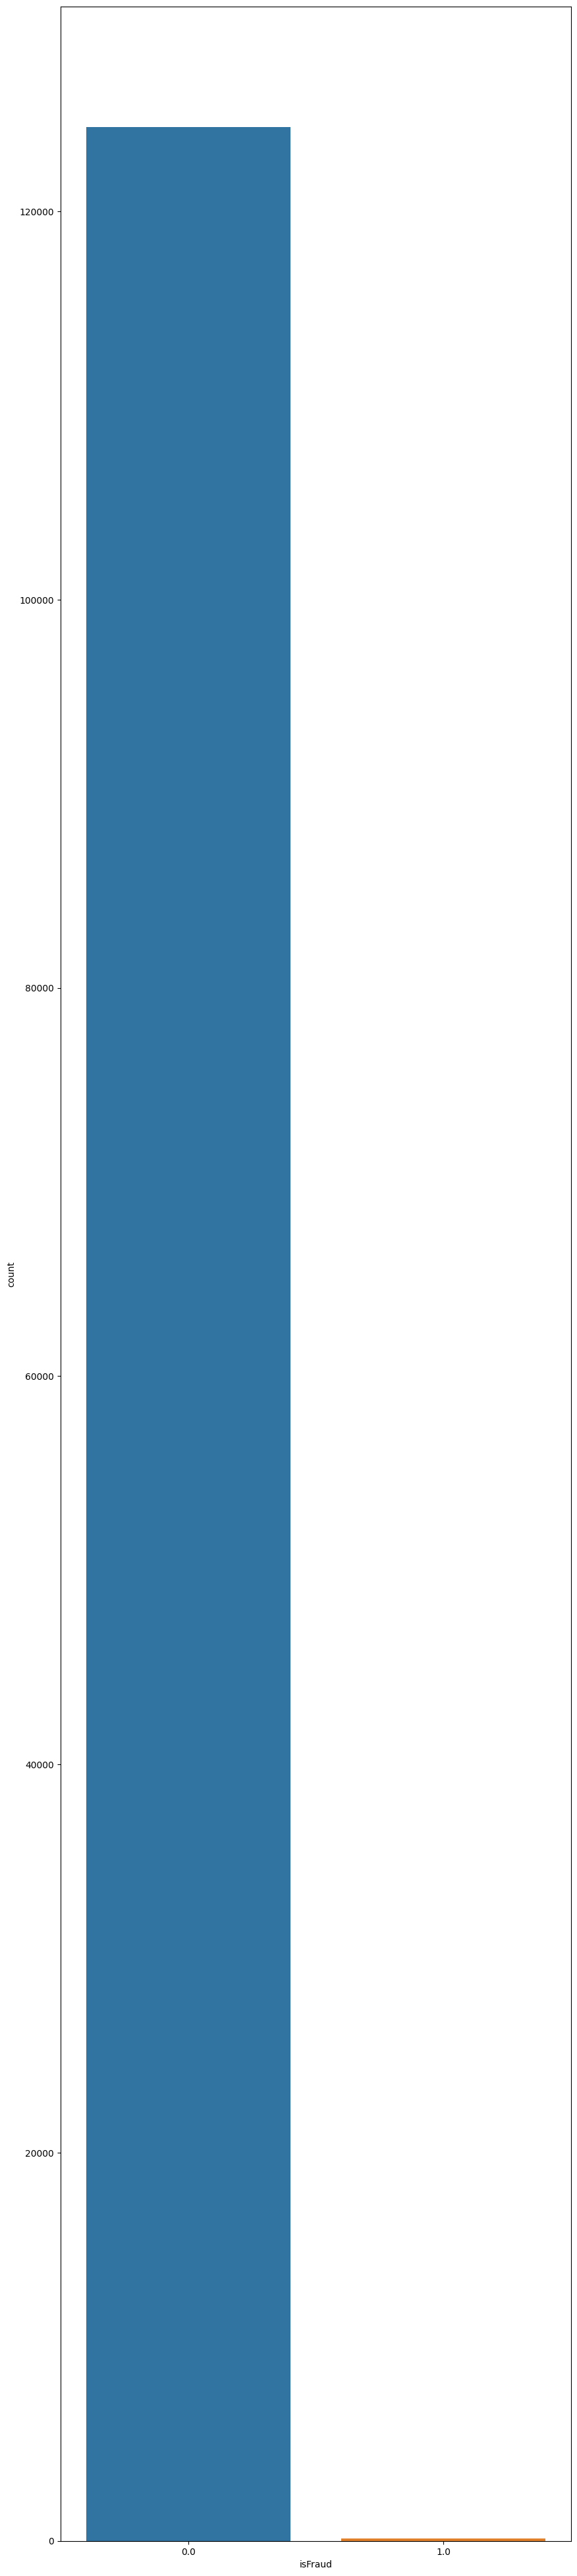

In [22]:
plt.figure(figsize=(10, 50))
sns.countplot(data=df,x='isFraud')

In [23]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#features_to_scale=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
#df[features_to_scale]=scaler.fit_transform(df[features_to_scale])

In [24]:
df['isFraud'].value_counts()

0.0    124336
1.0       120
Name: isFraud, dtype: int64

In [25]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

In [26]:
df.newbalanceOrig.fillna(df.newbalanceOrig.median(),inplace=True)
df.oldbalanceDest.fillna(df.oldbalanceDest.median(),inplace=True)
df.newbalanceDest.fillna(df.newbalanceDest.median(),inplace=True)
df.isFraud.fillna(df.isFraud.median(),inplace=True)


In [27]:
df.loc[df['isFraud']==0,'isFraud']='is not Fraud'
df.loc[df['isFraud']==1,'isFraud']='is Fraud'



In [28]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud


<Axes: xlabel='type', ylabel='count'>

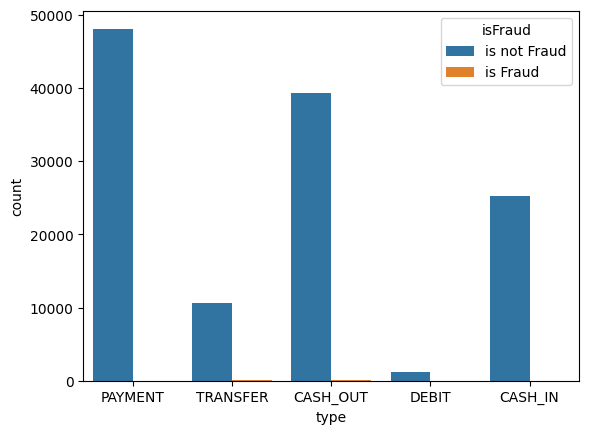

In [29]:
#fraud against type of payment
sns.countplot(data=df,x='type',hue='isFraud')

In [30]:
df.shape

(124457, 10)

In [31]:
#checking for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    0
nameDest          1
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [32]:
#dropping dest name and org name
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124457 entries, 0 to 124456
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            124457 non-null  float64
 1   type            124457 non-null  object 
 2   amount          124457 non-null  float64
 3   oldbalanceOrg   124456 non-null  float64
 4   newbalanceOrig  124457 non-null  float64
 5   oldbalanceDest  124457 non-null  float64
 6   newbalanceDest  124457 non-null  float64
 7   isFraud         124457 non-null  object 
dtypes: float64(6), object(2)
memory usage: 7.6+ MB


In [34]:
#object data labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.type=le.fit_transform(df.type)

In [35]:
df.type.value_counts()

3    48078
1    39349
0    25209
4    10650
2     1171
Name: type, dtype: int64

In [36]:
#dividing dataset in dependent and independent y and x respectively
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [37]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1.0,3,9839.64,170136.0,160296.36,0.0,0.0
1,1.0,3,1864.28,21249.0,19384.72,0.0,0.0
2,1.0,4,181.00,181.0,0.00,0.0,0.0
3,1.0,1,181.00,181.0,0.00,21182.0,0.0
4,1.0,3,11668.14,41554.0,29885.86,0.0,0.0


In [38]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [39]:
##from imblearn.over_sampling import SMOTE
#smote=SMOTE(random_state=42)
#x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
#resampling decreases the accuracy here so we will avoid

In [40]:
x_train.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     1
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

In [56]:
x_train.oldbalanceOrg.fillna(x_train.oldbalanceOrg.median(),inplace=True)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(99565, 7)
(24892, 7)
(24892,)
(99565,)


In [58]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9993572232042424

In [60]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [61]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,5,14
is not Fraud,2,24871


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.71      0.26      0.38        19
is not Fraud       1.00      1.00      1.00     24873

    accuracy                           1.00     24892
   macro avg       0.86      0.63      0.69     24892
weighted avg       1.00      1.00      1.00     24892



Decision tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9990358348063635

In [64]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [65]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,9,10
is not Fraud,14,24859


In [66]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.39      0.47      0.43        19
is not Fraud       1.00      1.00      1.00     24873

    accuracy                           1.00     24892
   macro avg       0.70      0.74      0.71     24892
weighted avg       1.00      1.00      1.00     24892



Extra tree Classifier


In [67]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()

In [68]:
etc.fit(x_train,y_train)
y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy


0.999156355455568

In [69]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)

In [70]:
train_accuracy

1.0

In [71]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,2,17
is not Fraud,4,24869


In [72]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       0.33      0.11      0.16        19
is not Fraud       1.00      1.00      1.00     24873

    accuracy                           1.00     24892
   macro avg       0.67      0.55      0.58     24892
weighted avg       1.00      1.00      1.00     24892



Support vector machine classifier


In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9992367025550377

In [74]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9990056746848792

In [75]:
pd.crosstab(y_test,y_test_predict4)

col_0,is not Fraud
isFraud,
is Fraud,19
is not Fraud,24873


In [76]:
print(classification_report(y_test,y_test_predict4))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    is Fraud       0.00      0.00      0.00        19
is not Fraud       1.00      1.00      1.00     24873

    accuracy                           1.00     24892
   macro avg       0.50      0.50      0.50     24892
weighted avg       1.00      1.00      1.00     24892



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


xgboost Classifier


In [77]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
y_train1=la.fit_transform(y_train)
y_test1=la.transform(y_test)
y_test1=la.transform(y_test)

import xgboost as xgb
xgb1=xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)
y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

0.9995179174031817

In [78]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

0.9999799126198966

In [79]:
pd.crosstab(y_test,y_test_predict5)

col_0,0,1
isFraud,,
is Fraud,10,9
is not Fraud,3,24870


In [80]:
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       1.00      1.00      1.00     24873

    accuracy                           1.00     24892
   macro avg       0.88      0.76      0.81     24892
weighted avg       1.00      1.00      1.00     24892



Compare the model

In [81]:
print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
print("train accuracy for dtc",accuracy_score(y_train_predict2,y_train))
print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
print("train accuracy for etc",accuracy_score(y_train_predict3,y_train))
print("test accuracy for etc",accuracy_score(y_test_predict3,y_test))
print("train accuracy for svc",accuracy_score(y_train_predict4,y_train))
print("test accuracy for svc",accuracy_score(y_test_predict4,y_test))
print("train accuracy for xgb1",accuracy_score(y_train_predict5,y_train1))
print("test accuracy for xgb1",accuracy_score(y_test_predict5,y_test1))

train accuracy for rfc 1.0
test accuracy for rfc 0.9993572232042424
train accuracy for dtc 1.0
test accuracy for dtc 0.9990358348063635
train accuracy for etc 1.0
test accuracy for etc 0.999156355455568
train accuracy for svc 0.9990056746848792
test accuracy for svc 0.9992367025550377
train accuracy for xgb1 0.9999799126198966
test accuracy for xgb1 0.9995179174031817


In [82]:
import pickle
pickle.dump(rfc,open('fraud.pkl','wb'))